In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygplates
import pygmt
import seaborn as sns
from pyrolite.geochem.norm import get_reference_composition

%matplotlib inline
%load_ext autoreload
%autoreload 2

f = get_reference_composition('Chondrite_SM89')


In [2]:
df_Tang = pd.read_excel('../datafiles/abf1876-tang-sm-database-s1.xlsx', sheet_name='Filtered')

df_Tang.Continent.unique()

df_Tang = df_Tang[(df_Tang.Continent.str.contains('S America')) & (df_Tang.Age<500)]


In [25]:
dfLee41 = pd.read_excel('../datafiles/zircons//Lee/Appendix_Tables.edt.xls', sheet_name='Appendix 4', skiprows=1)
dfLee42 = pd.read_excel('../datafiles/zircons//Lee/Appendix_Tables.edt.xls', sheet_name='Appendix 4_2', skiprows=1)

dfLee41.columns.values

array(['Analyzed spot', 'Rock type', 'Age (Ma) ±1s', 'Unnamed: 3',
       'Unnamed: 4', 'Hf (ppm)', 'La (ppm)', 'Ce (ppm)', 'Nd (ppm)',
       'Sm (ppm)', 'Eu (ppm)', 'Gd (ppm)', 'Dy (ppm)', 'Er (ppm)',
       'Yb (ppm)', 'EuN /EuN*', 'CeN /CeN*', 'Y (ppm)', 'Fe (ppm)',
       '48Ti (ppm)', '49Ti (ppm)'], dtype=object)

In [10]:
dfN = pd.read_excel('../datafiles/zircons//Nathwani/410_2020_1766_MOESM2_ESM.xlsx', 
                    sheet_name='3. Zircon U-Pb and Traces', skiprows=2)

f = get_reference_composition('Chondrite_SM89')

euN = dfN['Eu151_ppm'] / f.comp['Eu'].value
smN = dfN['Sm147_ppm'] / f.comp['Sm'].value
gdN = dfN['Gd157_ppm'] / f.comp['Gd'].value

dfN['eu_eu_star'] = euN / np.sqrt(smN * gdN)



In [5]:
dfJ = pd.read_excel('../datafiles/zircons//Jara/ScienceDirect_files_17Dec2021_06-35-22.334/1-s2.0-S1342937X2100023X-mmc2.xlsx', 
                    skiprows=3, skipfooter=6, header=[0, 1])

dfJ.replace({'BDL': np.nan}, inplace=True)

dfJ['PrefAge'] = dfJ['Pref. Age']['(Ma)']

euN = dfJ['Eu153']['Mean (ppm)'] / f.comp['Eu'].value
smN = dfJ['Sm147']['Mean (ppm)'] / f.comp['Sm'].value
gdN = dfJ['Gd157']['Mean (ppm)'] / f.comp['Gd'].value

dfJ['eu_eu_star'] = euN / np.sqrt(smN * gdN)
dfJ


In [6]:
dfCM = pd.read_excel('../datafiles/zircons//ChelleMichou/1-s2.0-S0024493714001005-mmc2.xlsx', 
                         sheet_name='Trace elements')

dfCM.dropna(inplace=True)
dfCM['age_ma'] = np.nan

dfCM['age_ma'].iloc[dfCM['Lazer spot'].str.contains('CC055')] = 40.374
dfCM['age_ma'].iloc[dfCM['Lazer spot'].str.contains('CC038')] = 40.211
dfCM['age_ma'].iloc[dfCM['Lazer spot'].str.contains('CC022')] = 35.633
dfCM['age_ma'].iloc[dfCM['Lazer spot'].str.contains('CC051')] = 35.597
dfCM['age_ma'].iloc[dfCM['Lazer spot'].str.contains('CC056')] = 35.20

euN = dfCM['Eu (ppm)'] / f.comp['Eu'].value
smN = dfCM['Sm (ppm)'] / f.comp['Sm'].value
gdN = dfCM['Gd (ppm)'] / f.comp['Gd'].value

dfCM['eu_eu_star'] = euN / np.sqrt(smN * gdN)


/opt/anaconda3/envs/pygmt4/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/anaconda3/envs/pygmt4/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
dfMunoz1 = pd.read_excel('../datafiles/zircons//Munoz/MunozZirconData.xlsx', sheet_name='Sheet1')
dfMunoz2 = pd.read_excel('../datafiles/zircons//Munoz/MunozZirconData.xlsx', sheet_name='Sheet2')

dfMunoz1['Sample'] = dfMunoz1.Sample.ffill()
dfMunoz2['Sample'] = dfMunoz2.Sample.ffill()

dfMunoz1.dropna(subset=['Eu'], inplace=True)
dfMunoz2.dropna(subset=['Spot'], inplace=True)

dfMunoz1.replace({'·': '.', '\xa0': ''}, regex=True, inplace=True)
dfMunoz2.replace({'·': '.', '\xa0': ''}, regex=True, inplace=True)


age_list = []
for i,row in dfMunoz1.iterrows():
    age = dfMunoz2[(dfMunoz2.Sample==row.Sample) & (dfMunoz2.Spot.astype(float)==row.Spot)]['Age']
    age_list.append(float(age.values[0]))
    th_u_list.append(float(dfMunoz2[(dfMunoz2.Sample==row.Sample) & (dfMunoz2.Spot.astype(float)==row.Spot)]['Th/U']))

dfMunoz1['age_ma'] = age_list


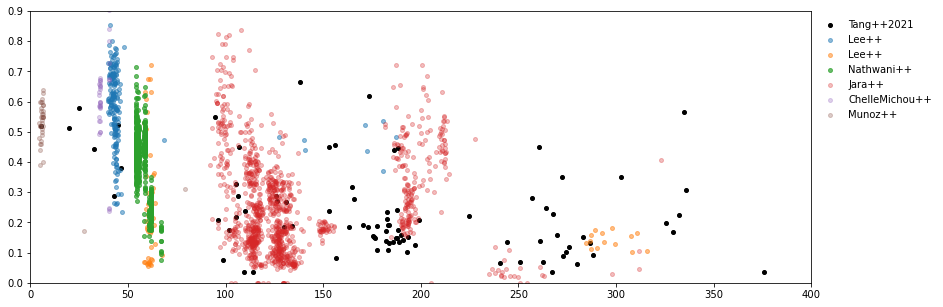

In [14]:
plt.figure(figsize=(14,5))
plt.plot(df_Tang.Age, df_Tang['Eu/Eu*zr'], 'ko', label='Tang++2021')
plt.plot(dfLee41['Age (Ma) ±1s'], dfLee41['EuN /EuN*'], 'o', alpha=0.5, label='Lee++')
plt.plot(dfLee42['Age (Ma) ± 1s'], dfLee42['EuN /EuN*'], 'o', alpha=0.5, label='Lee++')
plt.plot(dfN['Weighted Mean Age (Ma)'], dfN['eu_eu_star'], 'o', alpha=0.7, label='Nathwani++')
plt.plot(dfJ['PrefAge'], dfJ['eu_eu_star'], 'o', alpha=0.3, label='Jara++')
plt.plot(dfCM['age_ma'], dfCM['eu_eu_star'], 'o', alpha=0.3, label='ChelleMichou++')
plt.plot(dfMunoz1['age_ma'], dfMunoz1['EuN/ EuN*'].astype(float), 'o', alpha=0.3, label='Munoz++')
#plt.xlim(30,70)
plt.xlim(0,400)
plt.ylim(0,0.9)
plt.legend()


In [ ]:
ages_cat = []
eu_cat = []
ages_list = [subset.Age.tolist(), 
            dfLee41['Age (Ma) ±1s'].tolist(), 
            dfLee42['Age (Ma) ± 1s'].tolist(), 
            dfN['Weighted Mean Age (Ma)'].tolist(),
            PrefAge.tolist(),
            dfCM['age_ma'].tolist(),
            dfMunoz1['age_ma'].tolist()]

eu_list = [subset['Eu/Eu*zr'],
           dfLee41['EuN /EuN*'],
           dfLee42['EuN /EuN*'],
           eu_eu_star,
           eu_eu_starJ,
           eu_eu_starCM,
           dfMunoz1['EuN/ EuN*'].astype(float)]

for ages,eu in zip(ages_list,eu_list):
    ages_cat.extend(ages)
    eu_cat.extend(eu)
    
dff = pd.DataFrame(data={'age': ages_cat,
                         'eu_eu': eu_cat}).dropna()

#dff

dff['age_bin'] = np.round(dff['age']/10.)*10.
dff['thickness'] = 84.2 * dff['eu_eu'] + 24.5

dff = dff[dff['age_bin']<350.]

plt.figure(figsize=(16,6))
sns.boxenplot(x='age_bin', y='eu_eu', data=dff)
plt.show()


In [ ]:
dfJ.columns

#PrefAge = dfJ['Pref. Age']['(Ma)']

Th_U = dfJ['Th232']['Mean (ppm)'] / dfJ['U238*']['Mean (ppm)']

plt.figure(figsize=(16,6))
#plt.plot(PrefAge, Th_U, '.')
plt.plot(PrefAge, 1/dfJ['U/Th']['(#)'], '.')
plt.ylim(0,2)
plt.xlim(0,400)


In [ ]:
subset = df[df.Age<400.]
subset['age_bin'] = np.round(subset['Age']/20.)*20.

plt.figure(figsize=(16,16))
sns.boxenplot(x='age_bin', y='Eu/Eu*zr', data=subset)
#sns.scatterplot(x='age_bin', y='Eu/Eu*zr', data=subset, alpha=0.2)
#plt.ylim(0,60)
plt.show()

In [ ]:
age_max = 500.
age_bin = 10

#subset = df[(df.Continent.str.contains('Antarctica|Australia|S America')) & (df.Age<age_max)]
subset = df[(df.Continent.str.contains('S America')) & (df.Age<age_max)]
subset['age_bin'] = np.round(subset['Age']/age_bin)*age_bin

plt.figure(figsize=(16,10))
sns.boxplot(x='age_bin', y='Eu/Eu*zr', data=subset, hue='Continent', fliersize=0)
#sns.stripplot(x="age_bin", y="Eu/Eu*zr", data=subset, hue='Continent', dodge=True, color='k')
#sns.violinplot(x='age_bin', y='Eu/Eu*zr', data=subset, hue='Continent', split=True, bw=.5, inner="stick")
#sns.lineplot(x='age_bin', y='Eu/Eu*zr', data=subset, hue='Continent')

#sns.scatterplot(x='age_bin', y='Eu/Eu*zr', data=subset, alpha=0.2)
plt.ylim(0,1)
plt.show()


In [21]:
#dfN.columns.values
#dfMunoz2.columns.values


array(['Sample', 'Spot', 'Crystal', 'U', 'Th', 'Th/U', 'Age', '2σ'],
      dtype=object)

,Sample,Spot,Crystal,U,Th,Th/U,Age,2σ
2,"A Porphyry, Sample TT150",1.1,r,62,48,0.78,6.6,0.8
3,"A Porphyry, Sample TT150",3.1,r,76,62,0.82,6.8,0.6
4,"A Porphyry, Sample TT150",4.1,r,73,60,0.82,6.4,0.6
5,"A Porphyry, Sample TT150",5.2,r,64,52,0.81,5.7,0.8
6,"A Porphyry, Sample TT150",6.1,r,542,920,1.70,6.5,0.2
...,...,...,...,...,...,...,...,...
68,"Late Dacite Dike, Sample TT91",8.1,r,295,180,0.61,4.7,0.2
69,"Late Dacite Dike, Sample TT91",10.1,r,356,280,0.79,4.7,0.2
70,"Late Dacite Dike, Sample TT91",12.1,r,272,203,0.75,4.9,0.4
71,"Late Dacite Dike, Sample TT91",15.1,r,263,177,0.67,4.8,0.4
